<a href="https://colab.research.google.com/github/MrsIgnis/MMO_tasks/blob/main/MMO_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. Анализ целевой переменной Y с точки зрения статистики**

In [1]:
pip install pandas scikit-learn seaborn scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [3]:
# Зазгрузка набора данных
df = pd.read_csv('/content/pokemon.csv')

In [4]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [5]:
# Выведем все колонки для удобства
for column in df.columns:
  print(f'колонка: {column}')

колонка: #
колонка: Name
колонка: Type 1
колонка: Type 2
колонка: Total
колонка: HP
колонка: Attack
колонка: Defense
колонка: Sp. Atk
колонка: Sp. Def
колонка: Speed
колонка: Generation
колонка: Legendary


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [10]:
# Проверка на наличие пропущенных значений
print(df.isnull().sum()) # Пропуски есть в Type 2

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [22]:
# Удаление строк с пропусками
df_copy = df.copy()
df_copy.dropna(inplace=True)
print("\nУдаление строк с пропусками")
print(df_copy.isnull().sum())


Удаление строк с пропусками
#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64


В своём датасете я выбрала переменную Legendary в качестве целевой. У неё как раз 2 уникальных значения (True и False, к тому же она категориальная).

In [23]:
# Преобразуем столбец Legendary в бинарную переменную (значения 0 и 1)
df['Legendary'] = df['Legendary'].astype(int)

In [24]:
Y = df['Legendary'] # Выбираем целевую переменную (категориальную) (выходные данные)
X = df.drop('Legendary', axis=1) # Все остальные признаки, кроме Legendary (его удаляем), для предсказания значения Y (входные данные)

In [25]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,318,45,49,49,65,65,45,1
1,2,405,60,62,63,80,80,60,1
2,3,525,80,82,83,100,100,80,1
3,3,625,80,100,123,122,120,80,1
6,6,534,78,84,78,109,85,100,1
...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6
796,719,700,50,160,110,160,110,110,6
797,720,600,80,110,60,150,130,70,6
798,720,680,80,160,60,170,130,80,6


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


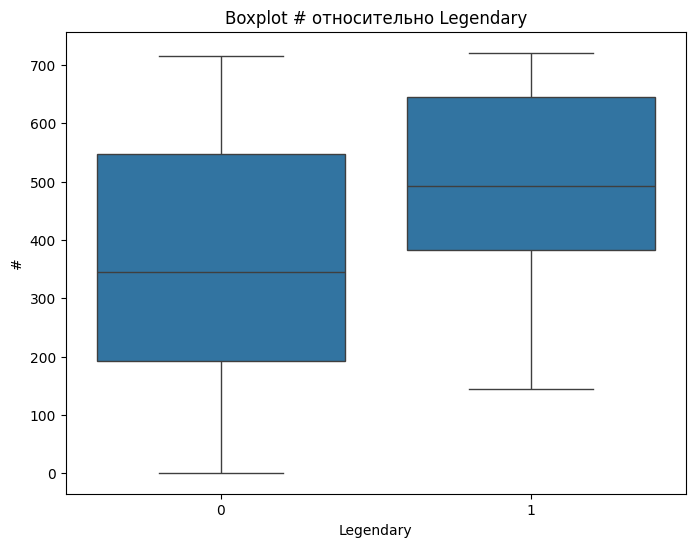

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


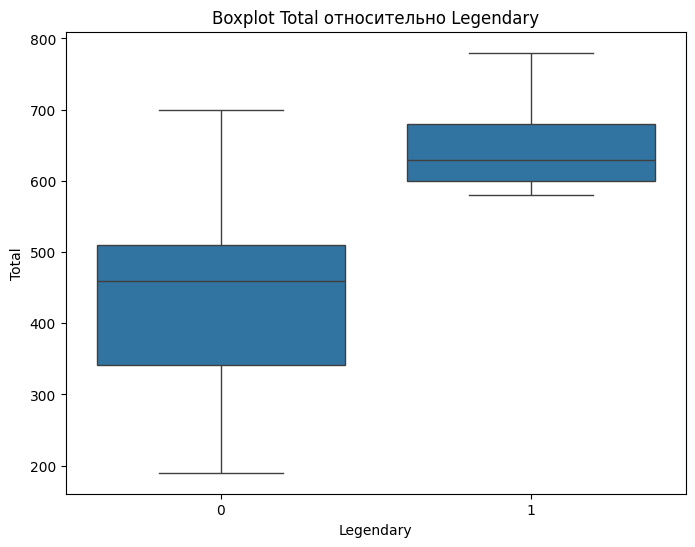

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


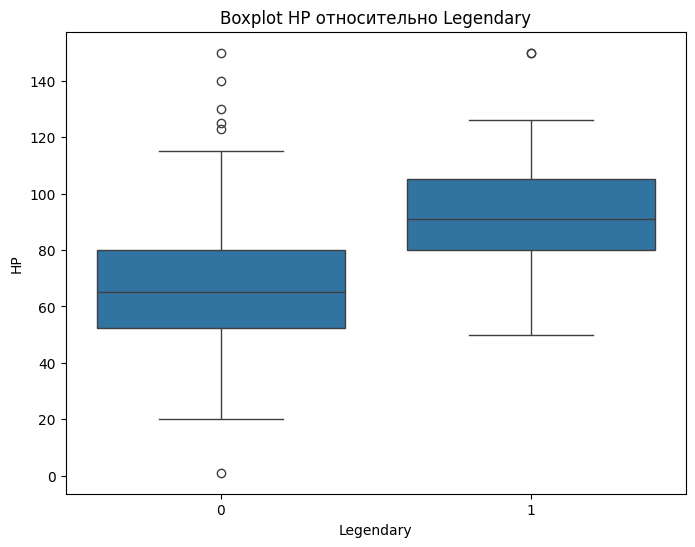

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


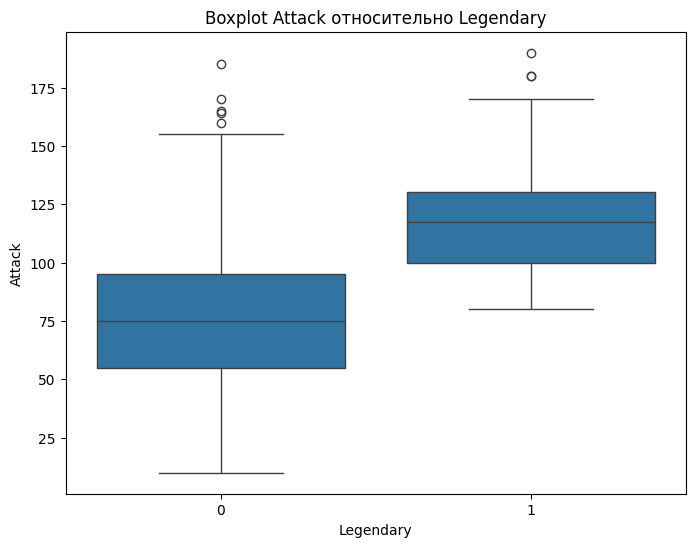

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


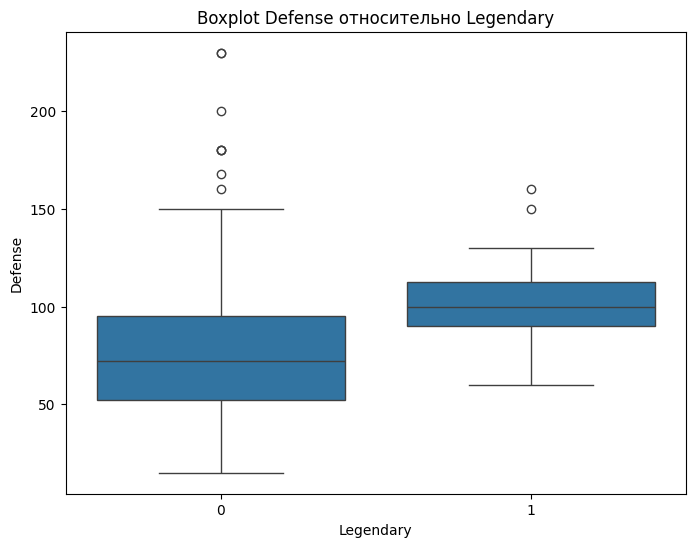

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


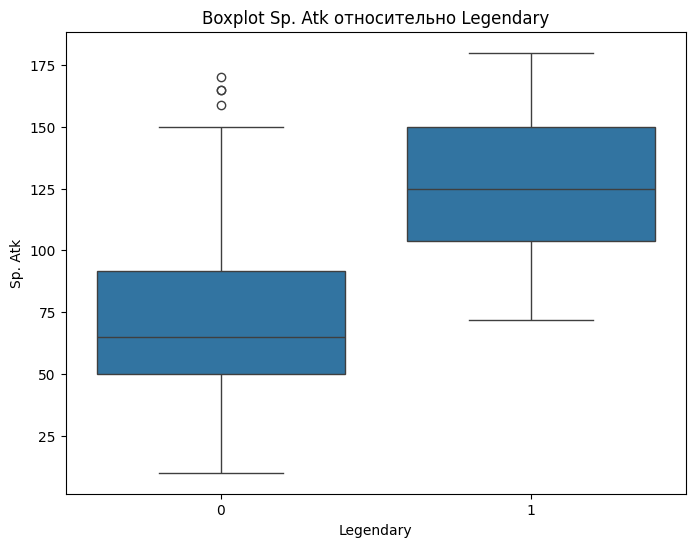

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


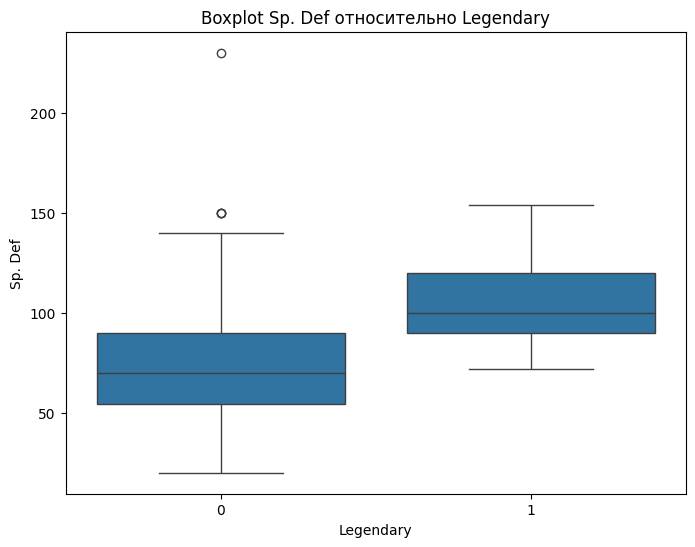

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


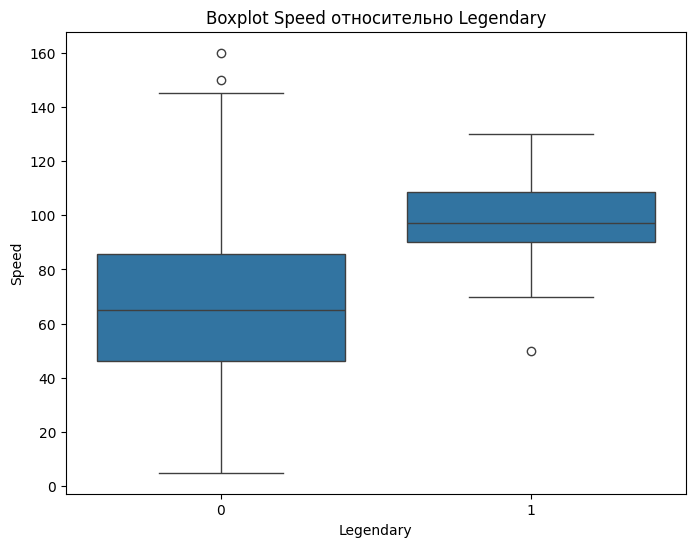

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


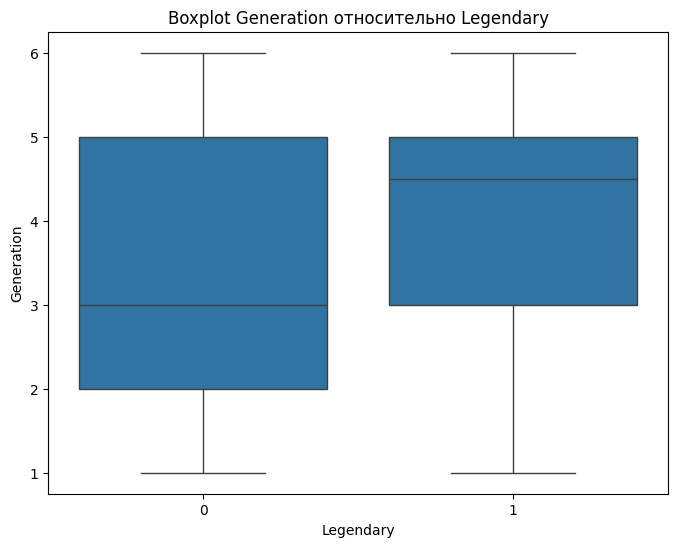

In [31]:
# Построение боксплота для каждой переменной
for col in numeric_cols:
  plt.figure(figsize=(8, 6))
  sn.boxplot(x='Legendary', y=col, data=df)
  plt.title(f'Boxplot {col} относительно Legendary')
  plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

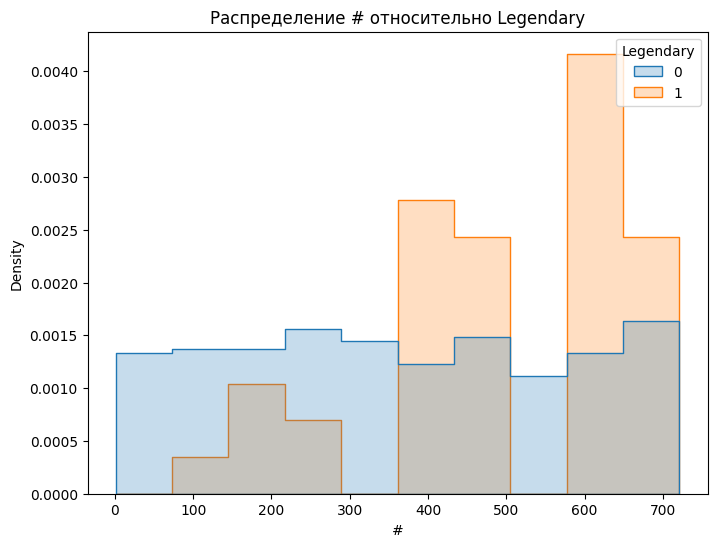

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

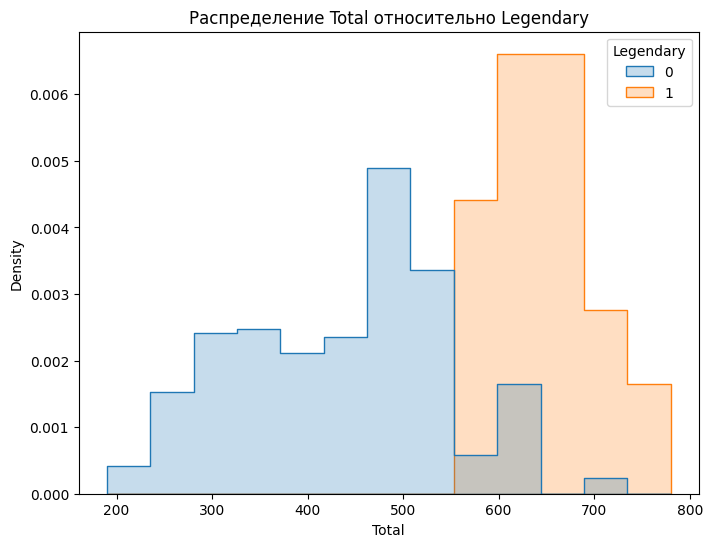

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

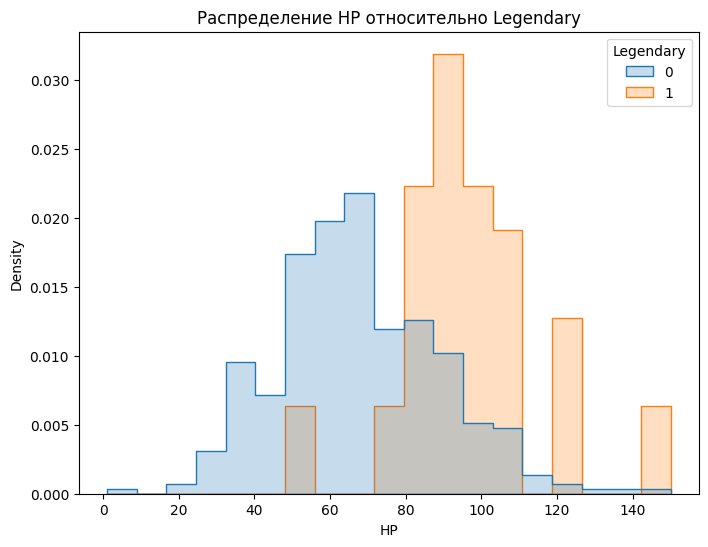

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

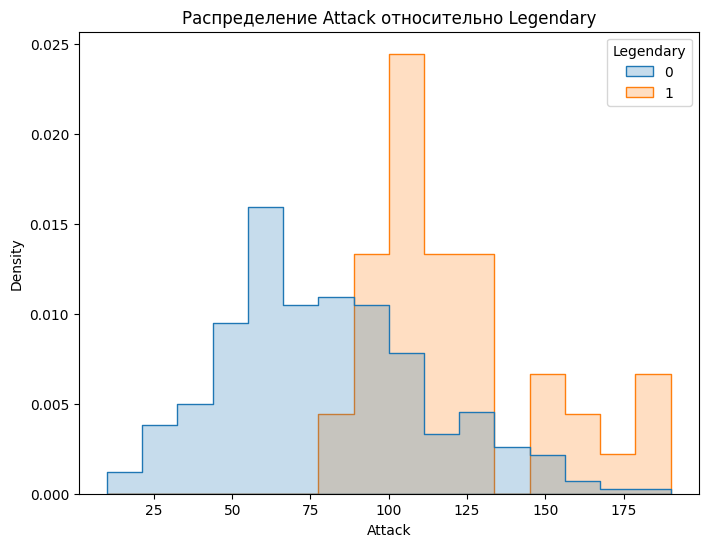

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

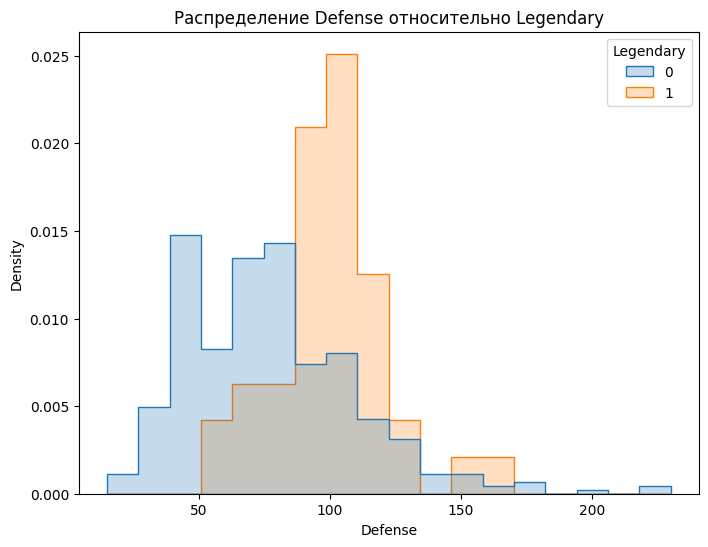

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

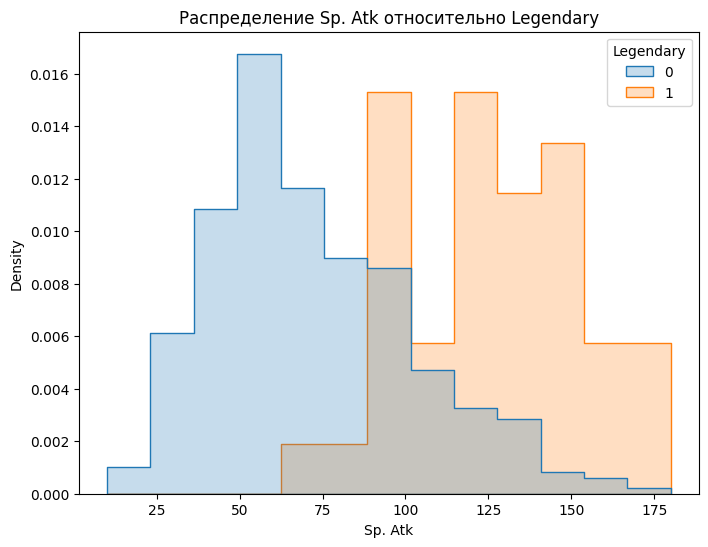

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

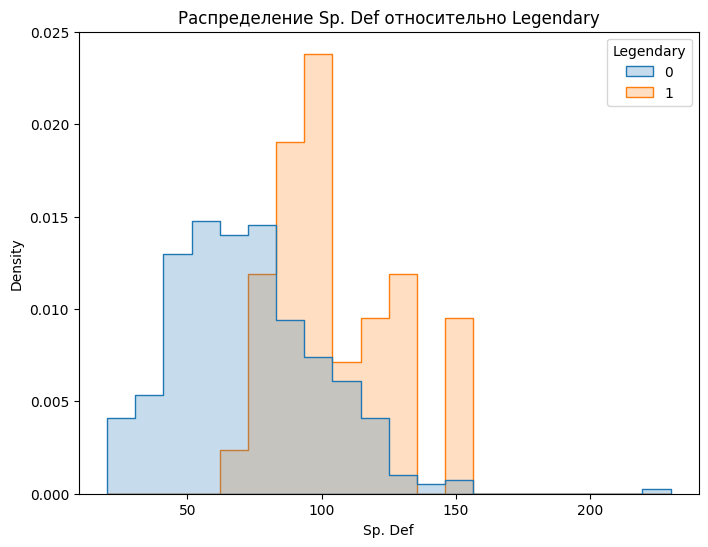

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

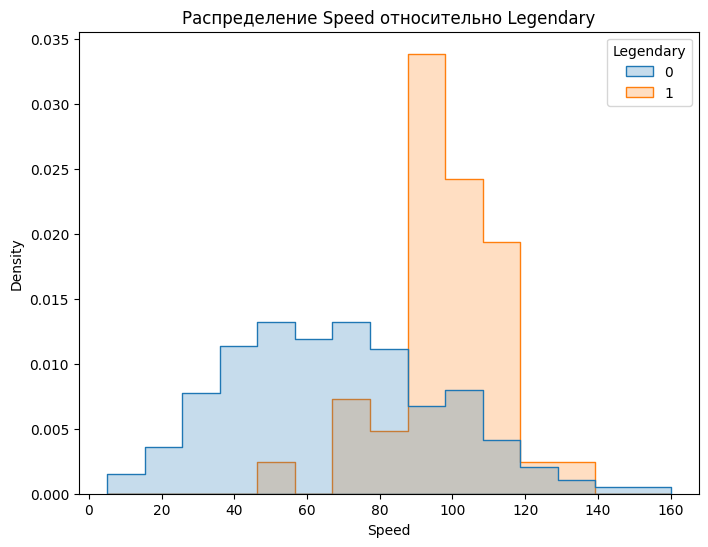

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

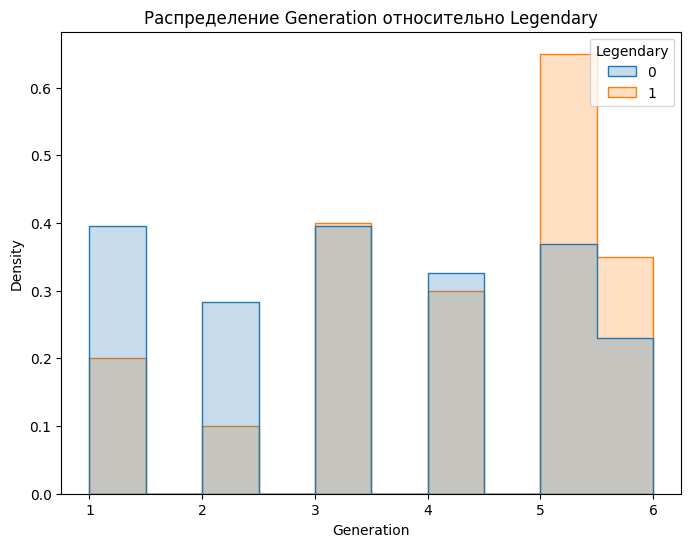

In [32]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
  plt.figure(figsize=(8, 6))
  sn.histplot(data=df, x=col, hue='Legendary', element="step", stat="density", common_norm=False)
  plt.title(f'Распределение {col} относительно Legendary')
  plt.show()

1. '#' относительно Legendary:
   - Распределение легендарных покемонов относительно форм распределено по диапазонам 70-280, 350-510 и 570-720, также начиная со второго диапазона они имеют большую частоту появления относительно обычных.
   - Это говорит о том, что # (Формы) может быть значимым признаком для определения, является ли покемон легендарным.


2. Total относительно Legendary:
   - Легендарные покемоны имеют более высокие общие показатели (Total). Их распределение смещено в диапазон 600–700, в то время как обычные покемоны (синие) сосредоточены в пределах 300–600.
   - Это говорит о том, что общий показатель (Total) может быть значимым признаком для определения, является ли покемон легендарным.

3. HP относительно Legendary:
   - Обычные покемоны имеют распределение HP с пиком в диапазоне от 50 до 80, что соответствует низкому и среднему уровню здоровья.
   - Легендарные покемоны характеризуются более высокими значениями HP, пик которых находится в районе 100, а некоторые имеют даже очень высокие значения (более 120).
   - Легендарные покемоны в среднем обладают более высоким уровнем здоровья (HP), чем обычные.

4. Attack относительно Legendary:
   - Легендарные покемоны в среднем имеют более высокие значения атаки (Attack), чем обычные покемоны. Для легендарных покемонов показатели атаки сосредоточены в районе 100–150, тогда как для обычных — в диапазоне 50–100.
   - Атака также может быть важным признаком для идентификации легендарного покемона.

5. Defense относительно Legendary:
   - Аналогичная картина: легендарные покемоны имеют более высокие показатели защиты (Defense) в диапазоне 100–150, тогда как обычные покемоны распределены в пределах 50–100.
   - Защита может также быть полезным признаком.

6. Sp. Atk относительно Legendary:
   - Специальная атака (Sp. Atk) легендарных покемонов также выше, чем у обычных. Большинство легендарных покемонов имеют показатели в диапазоне 100–150, тогда как обычные — от 50 до 100.
   - Это может быть еще один важный признак для определения легендарности покемона.

7. Sp. Def относительно Legendary:
   - Обычные покемоны имеют более широкий диапазон значений Sp. Def, сосредоточенных в интервале от 50 до 100, с небольшим количеством покемонов с характеристиками выше 100.
   - Легендарные покемоны, напротив, имеют более высокие показатели Sp. Def, начиная примерно со 100 и вплоть до 150. Это означает, что легендарные покемоны обладают в среднем более высокой специальной защитой.
   - Явный пик распределения для легендарных покемонов находится в районе 100–120, что говорит о том, что большинство легендарных покемонов обладают высоким показателем Sp. Def.

8. Speed относительно Legendary:
   - Легендарные покемоны имеют более высокие показатели скорости (Speed) в диапазоне 90–120, тогда как обычные покемоны распределены в пределах 30–70.
   - Скорость может также быть полезным признаком.

9. Generation относительно Legendary:
   - Начиная с 3 поколения большую часть покемонов составляют легендарные, особенно видна разница в 5 и 6 поколениях, где частота наибольшая.
   - Меньше всего легендарных покемонов во 2 поколении, в 1 их равное количество относительно обычных.
   - По поколению можно очень легко понять наибольшее распределение по легендарности покемонов.

### Выводы:
   - Легендарные покемоны в среднем имеют более высокие всех характеристик, чем обычные, в особенности Generation.
   - Все признаки могут быть значимыми для предсказания принадлежности покемона к классу "Legendary" в датасете.

In [39]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('Legendary')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('Legendary')[df.select_dtypes(include=['object']).columns].describe()


In [40]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
  print(f"Описательная статистика для {col}:\n")
  print(df.groupby('Legendary')[col].describe())
  print("\n" + "="*50 + "\n")

Описательная статистика для #:

           count        mean         std    min     25%    50%     75%    max
Legendary                                                                    
0          374.0  362.550802  211.159664    1.0  193.25  345.5  546.75  715.0
1           40.0  507.600000  183.804216  144.0  382.50  493.0  645.25  721.0


Описательная статистика для Total:

           count        mean         std    min     25%    50%    75%    max
Legendary                                                                   
0          374.0  436.454545  107.585825  190.0  341.25  460.0  510.0  700.0
1           40.0  645.250000   59.699568  580.0  600.00  630.0  680.0  780.0


Описательная статистика для HP:

           count       mean        std   min    25%   50%     75%    max
Legendary                                                               
0          374.0  67.893048  21.360541   1.0  52.25  65.0   80.00  150.0
1           40.0  96.425000  20.822679  50.0  80.00  91.

In [41]:
print("\nКатегориальные переменные:")
desc_stats_categorical
# freq - частота (или количество) наиболее частого значения, указанного в top


Категориальные переменные:


Name                        Type 1                     Type 2  \
          count unique        top freq  count unique     top freq  count   
Legendary                                                                  
0           374    374  Bulbasaur    1    374     18     Bug   52    374   
1            40     40   Articuno    1     40     12  Dragon   12     40   

                               
          unique     top freq  
Legendary                      
0             18  Flying   84  
1             13  Flying   13

### #:
- Для легендарных покемонов (Legendary = 1):
  - Среднее значение формы составляет **507.6**, с максимальным значением **721.0** и минимальным **144.0**. Это указывает на то, что легендарные покемоны имеют более высокие значения формы в сравнении с обычными.
  - Стандартное отклонение составляет **183.8**, что говорит о значительном разбросе значений формы среди легендарных покемонов.
  
- Для нелегендарных покемонов (Legendary = 0):
  - Среднее значение формы составляет **362.6**, с максимальным значением **715.0** и минимальным **1.0**.
  - Стандартное отклонение **211.2** показывает, что среди нелегендарных покемонов также присутствует широкий диапазон значений.

### Total:
- Легендарные покемоны имеют среднее значение **645.3**, что значительно выше среднего для нелегендарных покемонов (**436.5**). Это подтверждает, что легендарные покемоны имеют более высокие общие показатели.
- Стандартное отклонение для легендарных покемонов (**59.7**) меньше, чем для нелегендарных (**107.6**), что указывает на более однородный уровень силы среди легендарных покемонов.

### HP:
- Легендарные покемоны имеют среднее значение HP **96.4** против **67.9** у нелегендарных, что свидетельствует о большем запасе здоровья у легендарных покемонов.
- Стандартное отклонение для легендарных покемонов (**20.8**) также ниже, чем у нелегендарных (**21.4**).

### Attack, Defense, Sp. Atk, Sp. Def и Speed:
- **Attack**: Среднее значение атаки для легендарных покемонов составляет **120.2**, что значительно выше, чем у нелегендарных (**79.2**).
- **Defense**: Легендарные покемоны также имеют более высокие значения защиты (**99.6**) по сравнению с обычными покемонами (**77.5**).
- **Special Attack**: Среднее значение специальной атаки у легендарных покемонов **126.1**, в то время как у нелегендарных — **71.8**.
- **Special Defense**: Легендарные покемоны имеют среднее значение специальной защиты **105.8** по сравнению с **72.3** у нелегендарных.
- **Speed**: Легендарные покемоны имеют среднюю скорость **97.2**, тогда как у обычных покемонов она составляет **67.7**.

#### Generation:
- Легендарные покемоны в среднем принадлежат к более поздним поколениям (**4.1**) по сравнению с нелегендарными покемонами (**3.3**). Это может указывать на тенденцию к созданию более мощных покемонов в новых поколениях.

### Категориальные переменные `Name`, `Type 1` и `Type 2`:
  - Для нелегендарных покемонов:
    - Наиболее часто встречающимся именем является **Bulbasaur**, типом 1 — **Bug**, а типом 2 — **Flying**.
  - Для легендарных покемонов:
    - Наиболее часто встречающееся имя — **Articuno**, типом 1 — **Dragon**, а типом 2 — **Flying**.

### Вывод:
Анализ описательной статистики показывает, что легендарные покемоны обладают значительно более высокими характеристиками по сравнению с нелегендарными во всех рассматриваемых аспектах, включая форму, общий показатель, HP, атаки, защиты и скорость. Легендарные покемоны, как правило, имеют более высокие значения, что подтверждает их статус как более мощных существ. Кроме того, анализ категориальных переменных показывает разнообразие в типах покемонов, с преобладанием определенных типов среди как легендарных, так и нелегендарных покемонов.

# **II. Расчет теста Пирсона**

In [42]:
# Расчет коэффициента корреляции Пирсона для каждого признака
df[df.select_dtypes(include=[np.number]).columns].corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.128957,0.109955,0.105918,0.090547,0.065748,0.084785,0.068507,0.983625,0.201582
Total,0.128957,1.000000,0.669066,0.754465,0.598596,0.746982,0.691391,0.561656,0.063254,0.511054
HP,0.109955,0.669066,1.000000,0.518707,0.248920,0.456355,0.328665,0.271853,0.069728,0.368597
Attack,0.105918,0.754465,0.518707,1.000000,0.401001,0.408570,0.257964,0.403546,0.058433,0.359763
Defense,0.090547,0.598596,0.248920,0.401001,1.000000,0.196778,0.528286,-0.030993,0.040160,0.199898
Sp. Atk,0.065748,0.746982,0.456355,0.408570,0.196778,1.000000,0.480027,0.435450,0.018942,0.474865
Sp. Def,0.084785,0.691391,0.328665,0.257964,0.528286,0.480027,1.000000,0.208259,0.036356,0.354490
Speed,0.068507,0.561656,0.271853,0.403546,-0.030993,0.435450,0.208259,1.000000,0.039029,0.305780
Generation,0.983625,0.063254,0.069728,0.058433,0.040160,0.018942,0.036356,0.039029,1.000000,0.130808
Legendary,0.201582,0.511054,0.368597,0.359763,0.199898,0.474865,0.354490,0.305780,0.130808,1.000000


В данном случае корреляция Пирсона измеряет степень линейной зависимости между разными признаками покемонов. Значения корреляции варьируются от -1 до 1, где 1 означает сильную положительную корреляцию, -1 — сильную отрицательную, а 0 — отсутствие корреляции.

### 1. **# (Формы)**:
- Сильная положительная корреляция с **Generation** (0.983) — большинство покемонов, у которых больше форм, находятся в тех же поколениях, что и другие с похожими характеристиками.
- Небольшая положительная корреляция с **Legendary** (0.202) — легендарные покемоны чаще имеют больше форм.
- Умеренно низкие корреляции с другими характеристиками, что указывает на слабую зависимость между количеством форм и боевыми показателями покемонов.

### 2. **Total (Общая характеристика)**:
- Сильно положительно коррелирует с **Attack** (0.754), **Defense** (0.599), и **Sp. Atk** (0.747) — как и ожидалось, общий показатель покемона связан с его боевыми характеристиками.
- Средняя корреляция с **Legendary** (0.511) — легендарные покемоны имеют тенденцию к более высоким общим показателям.
- Относительно слабая корреляция с **#** (0.129) и **Generation** (0.063), что указывает на меньшую зависимость от этих характеристик.

### 3. **HP (Очки здоровья)**:
- Высокая корреляция с **Total** (0.669) и средняя с **Attack** (0.519) — чем выше здоровье покемона, тем больше его общий показатель и, как правило, его атака.
- Низкая корреляция с другими характеристиками, включая **Legendary** (0.369) — хотя легендарные покемоны имеют тенденцию к высокому HP, корреляция умеренная.

### 4. **Attack (Атака)**:
- Сильно коррелирует с **Total** (0.754) и умеренно с **Defense** (0.401) и **HP** (0.519) — чем выше атака, тем чаще эти покемоны имеют выше общие показатели и показатели защиты.
- Умеренная корреляция с **Legendary** (0.360) — легендарные покемоны часто обладают сильной атакой.

### 5. **Defense (Защита)**:
- Наибольшая корреляция с **Total** (0.599) и **Attack** (0.401), что естественно, так как покемоны с высоким уровнем защиты часто имеют сильные боевые характеристики.
- Умеренная отрицательная корреляция с **Speed** (-0.031) — чем выше защита, тем медленнее покемон, что логично для многих защитных типов.

### 6. **Sp. Atk (Специальная атака)**:
- Сильно коррелирует с **Total** (0.747), **Sp. Def** (0.480), и **Speed** (0.435) — покемоны со высокой специальной атакой часто имеют высокие общие показатели и скорость.
- Умеренная корреляция с **Legendary** (0.475) — легендарные покемоны часто обладают высокой специальной атакой.

### 7. **Sp. Def (Специальная защита)**:
- Умеренно коррелирует с **Defense** (0.528) и **Sp. Atk** (0.480) — покемоны с высокой специальной защитой часто имеют более высокие общие защитные характеристики.
- Умеренная корреляция с **Legendary** (0.354), что указывает на то, что у легендарных покемонов часто выше специальные защиты.

### 8. **Speed (Скорость)**:
- Умеренные корреляции с **Total** (0.562), **Attack** (0.404), и **Sp. Atk** (0.435) — быстрее покемоны часто имеют более высокие боевые характеристики.
- Низкая корреляция с **Legendary** (0.306) и отрицательная с **Defense** (-0.031), что может отражать тенденцию к снижению скорости у покемонов с высокими защитными характеристиками.

### 9. **Generation (Поколение)**:
- Сильная корреляция с **#** (0.984) — как уже отмечалось, количество форм покемонов связано с поколением.
- Низкая корреляция с другими признаками, что указывает на слабое влияние поколения на боевые характеристики.

### 10. **Legendary (Легендарность)**:
- Средняя положительная корреляция с **Total** (0.511), **Sp. Atk** (0.475), и **HP** (0.369) — легендарные покемоны часто имеют более высокие общие характеристики.
- Слабая корреляция с **Generation** (0.131) — легендарные покемоны не ограничиваются определенным поколением.

### Выводы:
- **Total** (Общая характеристика) и боевые показатели (например, **Attack**, **Defense**, **Sp. Atk**) имеют сильную взаимосвязь между собой.
- **Legendary** покемоны склонны иметь более высокие показатели по основным характеристикам.
- Характеристики, такие как **Speed** и **Defense**, проявляют более слабую зависимость друг от друга и с другими боевыми показателями.


# **III. Немного машинного обучения**

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [46]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Категориальные признаки: ", categorical_features)

Категориальные признаки:  ['Name', 'Type 1', 'Type 2']


In [49]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True)

In [50]:
X_processed

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Name_AbomasnowMega Abomasnow,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,1,318,45,49,49,65,65,45,1,False,...,False,False,False,False,False,True,False,False,False,False
1,2,405,60,62,63,80,80,60,1,False,...,False,False,False,False,False,True,False,False,False,False
2,3,525,80,82,83,100,100,80,1,False,...,False,False,False,False,False,True,False,False,False,False
3,3,625,80,100,123,122,120,80,1,False,...,False,False,False,False,False,True,False,False,False,False
6,6,534,78,84,78,109,85,100,1,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6,False,...,False,False,False,False,False,False,False,False,False,False
796,719,700,50,160,110,160,110,110,6,False,...,False,False,False,False,False,False,False,False,False,False
797,720,600,80,110,60,150,130,70,6,False,...,True,False,False,False,False,False,False,False,False,False
798,720,680,80,160,60,170,130,80,6,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['int64']).columns.tolist()

print("Числовые признаки: ", numeric_features)

Числовые признаки:  ['#', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']


In [52]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [53]:
X_processed

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Name_AbomasnowMega Abomasnow,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,0.000000,0.216949,0.295302,0.216667,0.158140,0.323529,0.214286,0.258065,0.0,False,...,False,False,False,False,False,True,False,False,False,False
1,0.001389,0.364407,0.395973,0.288889,0.223256,0.411765,0.285714,0.354839,0.0,False,...,False,False,False,False,False,True,False,False,False,False
2,0.002778,0.567797,0.530201,0.400000,0.316279,0.529412,0.380952,0.483871,0.0,False,...,False,False,False,False,False,True,False,False,False,False
3,0.002778,0.737288,0.530201,0.500000,0.502326,0.658824,0.476190,0.483871,0.0,False,...,False,False,False,False,False,True,False,False,False,False
6,0.006944,0.583051,0.516779,0.411111,0.293023,0.582353,0.309524,0.612903,0.0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.997222,0.694915,0.328859,0.500000,0.627907,0.529412,0.619048,0.290323,1.0,False,...,False,False,False,False,False,False,False,False,False,False
796,0.997222,0.864407,0.328859,0.833333,0.441860,0.882353,0.428571,0.677419,1.0,False,...,False,False,False,False,False,False,False,False,False,False
797,0.998611,0.694915,0.530201,0.555556,0.209302,0.823529,0.523810,0.419355,1.0,False,...,True,False,False,False,False,False,False,False,False,False
798,0.998611,0.830508,0.530201,0.833333,0.209302,0.941176,0.523810,0.483871,1.0,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
# Функция для обучения и оценки модели
def train_and_evaluate(X, Y):
  # Разделение данных на обучающую и тестовую выборки
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

  # Инициализация модели
  model = LogisticRegression(max_iter=1000)

  # Обучение модели
  model.fit(X_train, Y_train)

  # Предсказания на обучающейся выборке
  Y_train_pred = model.predict(X_train)
  train_accuracy = accuracy_score(Y_train, Y_train_pred)

  # Предсказание на тестовой выборке
  Y_test_pred = model.predict(X_test)
  test_accuracy = accuracy_score(Y_test, Y_test_pred)

  # Вывод результатов
  print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
  print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

  # Классификационный отчет
  print("\nКлассификационный отчет на тестовой выборке:")
  print(classification_report(Y_test, Y_test_pred))

  return model

In [59]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9728
Точность на тестовой выборке: 0.9277

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        75
           1       1.00      0.25      0.40         8

    accuracy                           0.93        83
   macro avg       0.96      0.62      0.68        83
weighted avg       0.93      0.93      0.91        83



In [60]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

                     Feature  Coefficient
1                      Total     2.189964
5                    Sp. Atk     2.098423
2                         HP     1.480169
0                          #     1.283188
3                     Attack     1.208289
..                       ...          ...
262                Name_Onix     0.000000
256             Name_Noivern     0.000000
237  Name_MeloettaAria Forme     0.000000
229              Name_Marill     0.000000
228             Name_Mantyke     0.000000

[456 rows x 2 columns]


# **IV. Построение модели логистической регрессии для предсказания легендарности покемона**

In [62]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.9227
Отклонение точности: 0.0248


In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

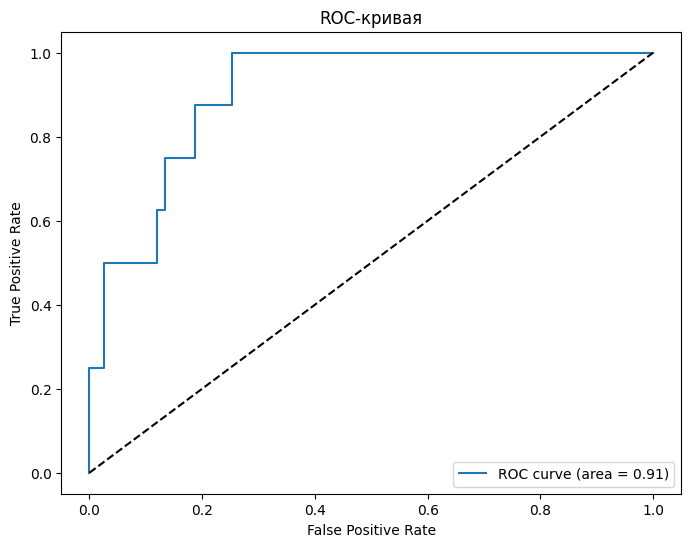

In [64]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()